<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/PythagoreanTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Pythagorean Theorem</h1></b>

Dr. Bingsen Wang

11/27/2024
</center>

#Python Code


0
0
250
500
0


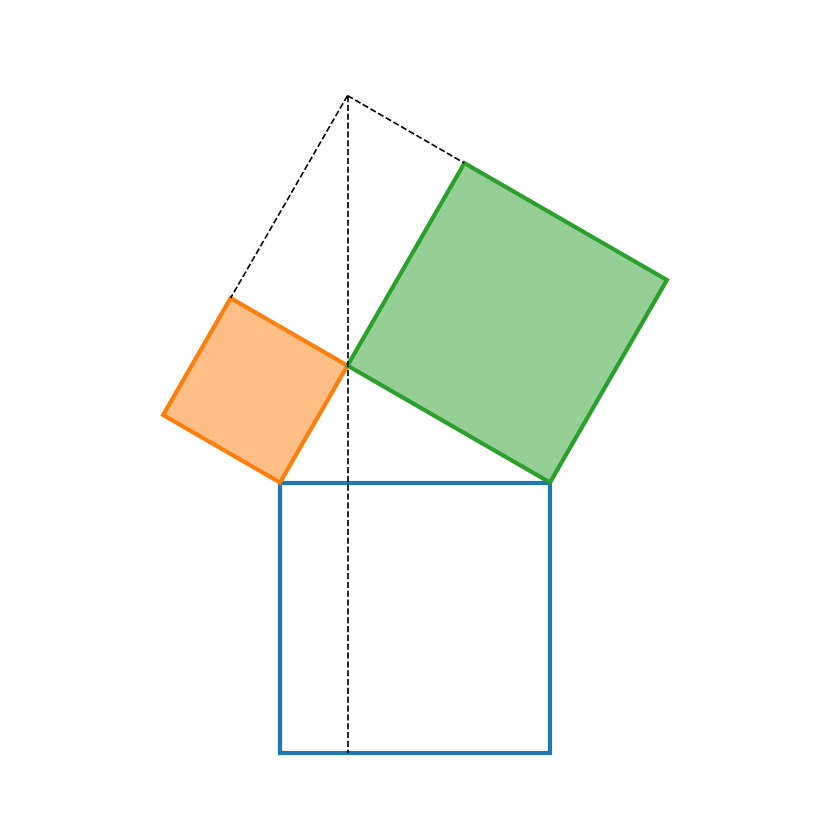

In [1]:
import numpy as np
from matplotlib import animation,pyplot,cm,patches
pyplot.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})

def axclear(ax):
  xlim,ylim=ax.get_xlim(),ax.get_ylim()
  ax.clear()
  ax.set_xlim(xlim),ax.set_ylim(ylim)
  ax.axis('off')
  return
def addshape(ax,vts,fc='none',ec='k',lw=2,alpha=1):
  ax.add_patch(patches.Polygon([[vts[k].real,vts[k].imag] for k in range(len(vts))],
                               fc=fc,ec=ec,lw=lw,alpha=alpha))
  return
def vpara(vsq,p,lmd): #return parallelogon verts in complex numbers
  return np.array([vsq[0],vsq[1],p*lmd+vsq[2]*(1-lmd),p*lmd+vsq[2]*(-lmd)+vsq[3]])
def vpara1(vpr,p,lmd): #return parallelogon verts in complex numbers
  h=vpr[1].imag-vpr[0].imag
  return np.array([vpr[0],vpr[1]-1j*h*lmd,p-1j*h*lmd,vpr[3]])
def vrec(vr,h,lmd): #return rectangle verts in complex numbers
  return vr-1j*h*lmd
Nf,r = 250,1
lmd=np.linspace(0,1,Nf)
theta=np.pi*2/3
vtri = r*np.array([1,np.exp(1j*theta),-1]) #verts of triangle
vsq1 = r*np.array([vtri[0]-2j*(1-(-1j)**k)/(1+1j) for k in range(4)]) #largest square
vsq2 = r*np.array([-1+(vtri[1]+1)*(1-(1j)**k)/(1-1j) for k in range(4)]) #left square
vsq3 = r*np.array([1+(vtri[1]-1)*(1-(-1j)**k)/(1+1j) for k in range(4)]) #right square
p0 = -vtri[1]+vsq2[2]+vsq3[2] #highest point
vpr21_end = vpara(vsq2,p0,1) #left parallelogon step1 end
vpr31_end = vpara(vsq3,p0,1) #right parallelogon step1 end
vpr22_end = vpara1(vpr21_end,p0,1) #left parallelogon step2 end
vpr32_end = vpara1(vpr31_end,p0,1) #right parallelogon step2 end

xn,xm,yn,ym=-3,3,-2.5,3.5
clst = list(cm.tab10.colors)#colors of lines
fig = pyplot.figure(figsize=([9,9]),facecolor='none')
ax = fig.add_axes((.05,0.05,.9,.9),xlim=[xn,xm],ylim=[yn,ym],fc='none')
ax1 = fig.add_axes((.05,0.05,.9,.9),xlim=[xn,xm],ylim=[yn,ym],fc='none')
ax.axis('off')
ax.plot([p0.real,p0.real],[p0.imag,-2],'--k',lw=1.2)
ax.plot([p0.real,vsq2[2].real],[p0.imag,vsq2[2].imag],'--k',lw=1.2)
ax.plot([p0.real,vsq3[2].real],[p0.imag,vsq3[2].imag],'--k',lw=1.2)
for k in range(3) :
  addshape(ax,[vsq1,vsq2,vsq3][k],fc='none',ec=clst[k],lw=3)

def animate(ii):
  i,kk=ii%Nf,ii//Nf
  if i==0: print(ii) #for monitoring
  axclear(ax1)
  for k in range(2):
    if kk==0:
      vpr21 = vpara(vsq2,p0,lmd[i]) #left parallelogon step1
      vpr31 = vpara(vsq3,p0,lmd[i]) #right parallelogon step1
      addshape(ax1,[vpr21,vpr31][k],fc=clst[k+1],ec='none',lw=0,alpha=0.5)
    elif kk==1:
      vpr22 = vpara1(vpr21_end,p0,lmd[i]) #left parallelogon step2
      vpr32 = vpara1(vpr31_end,p0,lmd[i]) #right parallelogon step2
      addshape(ax1,[vpr22,vpr32][k],fc=clst[k+1],ec='none',lw=0,alpha=0.5)
    else:
      vpr23 = vrec(vpr22_end,2*r,lmd[i]) #left parallelogon step3
      vpr33 = vrec(vpr32_end,2*r,lmd[i]) #right parallelogon step3
      addshape(ax1,[vpr23,vpr33][k],fc=clst[k+1],ec='none',lw=0,alpha=0.5)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf*3, interval=200)
anim.save("pythagorean.mp4", writer=animation.FFMpegWriter(fps=50), dpi=200)